# Music

## 1. Importing the required libraries for EDA

Below are the libraries that are used in order to perform EDA and Random Forect Regressor

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import warnings
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes = True)
sns.set_palette(palette = 'magma', n_colors = 8)


## 2. Loading the data into the data frame.

In [80]:
df = pd.read_csv("Impact_music_mental_health.csv")
data = df
# To display the top 5 rows
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [82]:
data.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


## 3. Checking the types of data

In [83]:
data.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [84]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


In [85]:
data.describe(exclude = 'number').T

,count,unique,top,freq
Timestamp,736,729,09/01/2022 15:24,2
Primary streaming service,735,6,Spotify,458
While working,733,2,Yes,579
Instrumentalist,732,2,No,497
Composer,735,2,No,609
Fav genre,736,16,Rock,188
Exploratory,736,2,Yes,525
Foreign languages,732,2,Yes,404
Frequency [Classical],736,4,Rarely,259
Frequency [Country],736,4,Never,343


### 4. REMOVE OUTLIERS

In [86]:
age_index = data[(data['Age'] > 70)].index
age_index

Index([428, 429, 490, 494, 527, 695], dtype='int64')

In [87]:
data = data.drop(age_index,axis=0)

In [88]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,729.0,2.478464e+01,1.115039e+01,10.0,18.0,21.0,27.0,70.0
Hours per day,730.0,3.551096e+00,2.939285e+00,0.0,2.0,3.0,5.0,24.0
BPM,624.0,1.602688e+06,4.003203e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,730.0,5.862329e+00,2.780595e+00,0.0,4.0,6.0,8.0,10.0
Depression,730.0,4.821918e+00,3.024897e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,730.0,3.755479e+00,3.081117e+00,0.0,1.0,3.0,6.0,10.0
OCD,730.0,2.652055e+00,2.847790e+00,0.0,0.0,2.0,5.0,10.0


In [89]:
hpd_index = data[data['Hours per day'] >= 15].index
hpd_index

Index([18, 290, 347, 359, 366, 485, 726], dtype='int64')

In [90]:
data = data.drop(hpd_index, axis = 0)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,722.0,2.479363e+01,1.112832e+01,10.0,18.0,21.0,27.0,70.0
Hours per day,723.0,3.402905e+00,2.510217e+00,0.0,2.0,3.0,4.0,14.0
BPM,618.0,1.618247e+06,4.022589e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,723.0,5.860996e+00,2.783081e+00,0.0,4.0,6.0,8.0,10.0
Depression,723.0,4.818811e+00,3.014454e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,723.0,3.735131e+00,3.070846e+00,0.0,1.0,3.0,6.0,10.0
OCD,723.0,2.636238e+00,2.836210e+00,0.0,0.0,2.0,5.0,10.0


In [91]:
bpm_index = data[data['BPM'] > 200].index
bpm_index

Index([248, 353, 498, 564, 568, 610, 644, 662, 711], dtype='int64')

In [92]:
data = data.drop(bpm_index, axis = 0)

In [93]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,713.0,24.813464,11.107758,10.0,18.0,21.0,27.0,70.0
Hours per day,714.0,3.405182,2.518266,0.0,2.0,3.0,4.0,14.0
BPM,609.0,121.972085,32.452408,0.0,100.0,120.0,141.0,200.0
Anxiety,714.0,5.871849,2.783321,0.0,4.0,6.0,8.0,10.0
Depression,714.0,4.817927,3.015116,0.0,2.0,5.0,7.0,10.0
Insomnia,714.0,3.733193,3.067136,0.0,1.0,3.0,6.0,10.0
OCD,714.0,2.638655,2.838642,0.0,0.0,2.0,5.0,10.0


Removed not needed Column

In [94]:
data.drop(['Timestamp','Permissions'], axis = 1, inplace = True)

In [95]:
data

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,120.0,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


### 5. Correlation Check

In [ ]:
corr_data = data.corr()['Age']
corr_data.sort_values()

### 6. Removing Missing Values

In [105]:
data.isnull().sum()

Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             105
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [107]:
data['Age'] = data['Age'].fillna(round(data['Age'].mean(),0))

In [108]:
data.isnull().sum()

Age                               0
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             105
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [110]:
data['Primary streaming service'] = data['Primary streaming service'].fillna(data['Primary streaming service'].mode()[0])

In [111]:
data.isnull().sum()

Age                               0
Primary streaming service         0
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             105
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [112]:
data['While working'] = data['While working'].fillna(data['While working'].mode()[0])

In [113]:
data.isnull().sum()

Age                               0
Primary streaming service         0
Hours per day                     0
While working                     0
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             105
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [114]:
data['Instrumentalist'] = data['Instrumentalist'].fillna(data['Instrumentalist'].mode()[0])

In [115]:
data.isnull().sum()

Age                               0
Primary streaming service         0
Hours per day                     0
While working                     0
Instrumentalist                   0
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             105
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [116]:
data['Composer'] = data['Composer'].fillna(data['Composer'].mode()[0])

In [117]:
data['Foreign languages'] = data['Foreign languages'].fillna(data['Foreign languages'].mode()[0])

In [118]:
data.isnull().sum()

Age                               0
Primary streaming service         0
Hours per day                     0
While working                     0
Instrumentalist                   0
Composer                          0
Fav genre                         0
Exploratory                       0
Foreign languages                 0
BPM                             105
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [129]:
null_BPM = data[data['BPM'].isnull()==True]
null_BPM

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
10,18.0,Spotify,3.0,Yes,Yes,No,Country,Yes,No,NaN,...,Rarely,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect
12,25.0,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,NaN,...,Sometimes,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve
15,17.0,Spotify,2.0,No,No,No,Pop,Yes,Yes,NaN,...,Very frequently,Rarely,Sometimes,Sometimes,Rarely,7.0,5.0,4.0,1.0,Worsen
30,20.0,Apple Music,5.0,Yes,Yes,No,Rock,Yes,Yes,NaN,...,Sometimes,Sometimes,Sometimes,Very frequently,Rarely,7.0,7.0,2.0,0.0,Improve
32,19.0,Spotify,6.0,Yes,Yes,No,Metal,Yes,Yes,NaN,...,Sometimes,Never,Never,Sometimes,Sometimes,9.0,8.0,2.0,3.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,18.0,Spotify,4.0,Yes,No,No,R&B,No,No,NaN,...,Sometimes,Very frequently,Sometimes,Never,Never,8.0,0.0,0.0,2.0,No effect
700,20.0,YouTube Music,1.0,Yes,No,No,Pop,No,Yes,NaN,...,Very frequently,Rarely,Sometimes,Rarely,Very frequently,8.0,9.0,6.0,5.0,Worsen
706,23.0,Spotify,1.0,Yes,Yes,No,Rock,Yes,Yes,NaN,...,Very frequently,Sometimes,Sometimes,Very frequently,Very frequently,8.0,6.0,1.0,4.0,Improve
712,23.0,I do not use a streaming service.,3.0,Yes,No,No,Rock,No,No,NaN,...,Sometimes,Rarely,Never,Very frequently,Never,10.0,5.0,2.0,0.0,Improve


In [136]:
unique_genre = null_BPM['Fav genre'].unique()
unique_genre

array(['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical',
       'Video game music', 'R&B', 'Folk', 'Jazz', 'EDM', 'Gospel',
       'K pop', 'Rap'], dtype=object)

In [134]:
for i in unique_genre:
    data['BPM'] = data['BPM'].fillna(round(data[data['Fav genre'] == i]['BPM'].mean(),0))

In [137]:
data.isnull().sum()

Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

In [139]:
data.shape

(714, 31)

In [140]:
df = data.copy()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

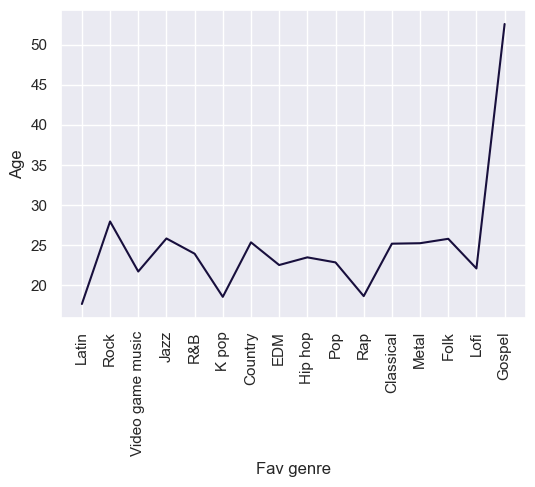

In [145]:
plt.figure(figsize=(6,4))
sns.lineplot(x=data['Fav genre'], y=data['Age'], ci=None)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

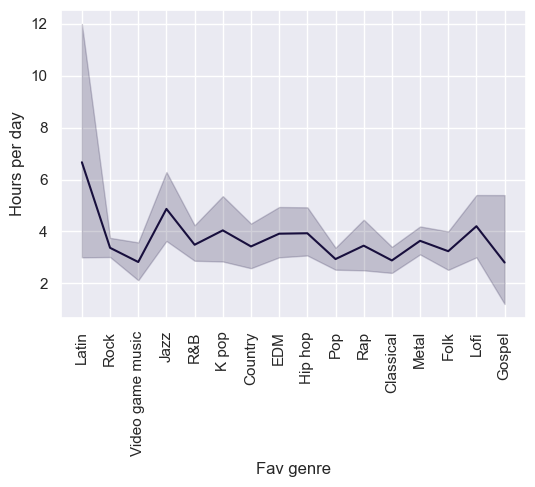

In [153]:
plt.figure(figsize=(6,4))
sns.lineplot(x = data['Fav genre'], y = data['Hours per day'])
plt.xticks(rotation=90)

plt.figure(figsize=(6,4))
sns.barplot(x=data['Fav genre'],y=data['Anxiety'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

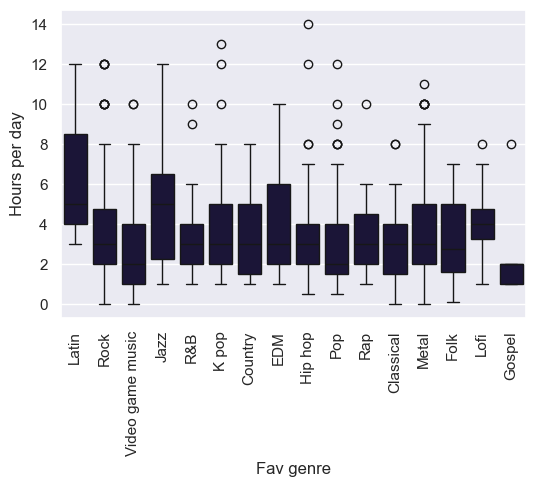

In [155]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Fav genre'],y=data['Hours per day'])
plt.xticks(rotation=90)

What is the highest Genre that causes Depression and how many hours?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

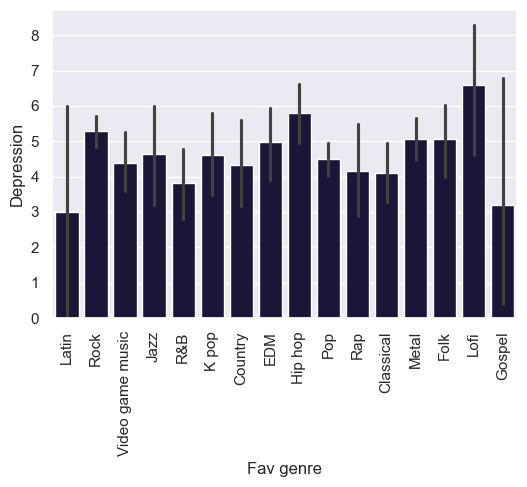

In [165]:
plt.figure(figsize=(6,4))
sns.barplot(x=data['Fav genre'],y=data['Depression'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

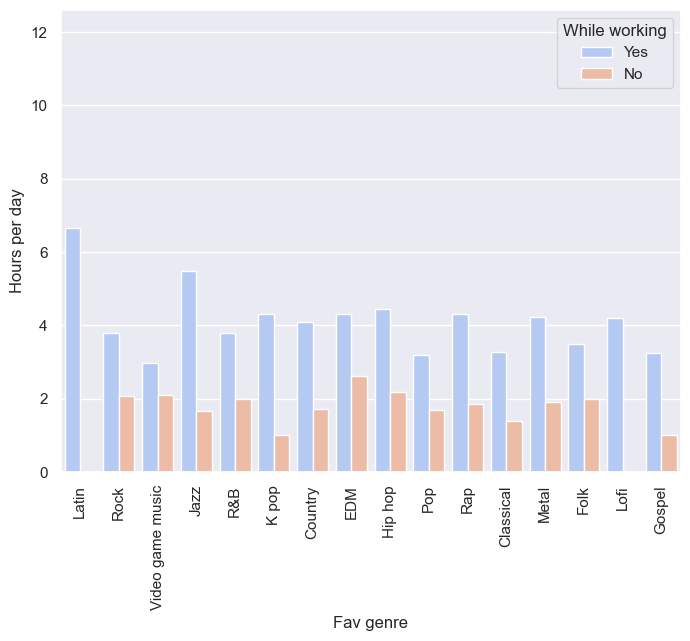

In [169]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Hours per day'], hue=data['While working'],errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)